In [72]:
import sys
import warnings
sys.path.insert(0, '/data16/marcus/scripts/nanoporePipelineScripts')
import nanoporePipelineCommon as npCommon

from tqdm.notebook import tqdm

import seaborn as sea
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import dash_bio
pio.renderers.default = "browser"

import numpy as np
import pandas as pd 
import statistics as stats
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)

CONVERSION_DICT = npCommon.CONVERSION_DICT
REV_CONVERSION_DICT = {val: key for key, val in CONVERSION_DICT.items()}

print(f"Imports done at {npCommon.get_dt(for_print=True)}")

Imports done at 10/10/23 @ 04:55:51 PM


In [15]:
output_df_path = "/home/marcus/Insync/mviscard@ucsc.edu/Google Drive/insync_folder/NMD_cleavage_and_deadenylation_paper/raw_figures_from_python/231010_fishers/231010_statTests_fishers_largeDF.parquet"
output_df_raw = pd.read_parquet(output_df_path)
output_df_raw.head()

gene_hits_newerN2_t5+  gene_rpm_newerN2_t5+  gene_hits_newerN2_t5-  gene_rpm_newerN2_t5-  total_gene_rpm_newerN2  total_gene_hits_newerN2  fraction_adapted_newerN2  \
chr_id gene_id        gene_name                                                                                                                                                                        
I      WBGene00000013 abf-2                        0.0              0.000000                    2.0              4.013284                4.013284                      2.0                  0.000000   
       WBGene00000138 amx-2                        0.0              0.000000                    7.0             14.046494               14.046494                      7.0                  0.000000   
       WBGene00000140 anc-1                        0.0              0.000000                   36.0             72.239111               72.239111                     36.0                  0.000000   
       WBGene00000150 apm-1                        1.0              2.006642                   34.0             68.225827               70.232469                     35.0                  0.028571   
       WBGene00000158 apg-1                        5.0             10.033210                   41.0             82.272321               92.305531                     46.0                  0.108696   

                                 gene_hits_newerS5_t5+  gene_rpm_newerS5_t5+  gene_hits_newerS5_t5-  gene_rpm_newerS5_t5-  total_gene_rpm_newerS5  total_gene_hits_newerS5  fraction_adapted_newerS5  \
chr_id gene_id        gene_name                                                                                                                                                                        
I      WBGene00000013 abf-2                        1.0              2.454807                    0.0              0.000000                2.454807                      1.0                  1.000000   
       WBGene00000138 amx-2                        1.0              2.454807                    7.0             17.183649               19.638456                      8.0                  0.125000   
       WBGene00000140 anc-1                        1.0              2.454807                   38.0             93.282666               95.737473                     39.0                  0.025641   
       WBGene00000150 apm-1                        3.0              7.364421                   28.0             68.734596               76.099017                     31.0                  0.096774   
       WBGene00000158 apg-1                        4.0              9.819228                   21.0             51.550947               61.370175                     25.0                  0.160000   

                                 gene_hits_newerS6_t5+  gene_rpm_newerS6_t5+  gene_hits_newerS6_t5-  gene_rpm_newerS6_t5-  total_gene_rpm_newerS6  total_gene_hits_newerS6  fraction_adapted_newerS6  \
chr_id gene_id        gene_name                                                                                                                                                                        
I      WBGene00000013 abf-2                        0.0              0.000000                    1.0              1.337658                1.337658                      1.0                  0.000000   
       WBGene00000138 amx-2                        0.0              0.000000                   27.0             36.116778               36.116778                     27.0                  0.000000   
       WBGene00000140 anc-1                        2.0              2.675317                   66.0             88.285456               90.960773                     68.0                  0.029412   
       WBGene00000150 apm-1                        1.0              1.337658                   63.0             84.272481               85.610139                     64.0                  0.015625   
       WBGene00000158 apg-1    

In [18]:
lib_comps_run = []
for col in output_df_raw.columns:
    if col.endswith("fishers_significant"):
        lib1, lib2 = col.split("_v_")[0], col.split("_v_")[1].split("_fishers_significant")[0]
        print(lib1, lib2)
        lib_comps_run.append((lib1, lib2))
libs_run = set([lib for lib1, lib2 in lib_comps_run for lib in [lib1, lib2]])

oldN2 oldS6
newerN2 newerS6
newerN2 newerS5
thirdN2 thirdS6
thirdN2 thirdS5


In [134]:
min_cutoff_hits = 10

output_df = output_df_raw.copy()
min_cutoff_masks = [output_df[f'total_gene_hits_{lib}'] >= min_cutoff_hits for lib in libs_run]
sig_cutoff_masks = [output_df[f'{lib1}_v_{lib2}_fishers_significant'] for lib1, lib2 in lib_comps_run]
# output_df = output_df.all(min_cutoff_masks)
output_df[f'passed_{min_cutoff_hits}_hit_cutoff_for_all'] = pd.concat(min_cutoff_masks, axis=1).all(axis=1)  # >= len(min_cutoff_masks)
output_df['num_sig_hits'] = pd.concat(sig_cutoff_masks, axis=1).sum(axis=1)
output_df = output_df[output_df[f'passed_{min_cutoff_hits}_hit_cutoff_for_all']]
output_df.sort_values("num_sig_hits", ascending=False)

gene_hits_newerN2_t5+  gene_rpm_newerN2_t5+  gene_hits_newerN2_t5-  gene_rpm_newerN2_t5-  total_gene_rpm_newerN2  total_gene_hits_newerN2  fraction_adapted_newerN2  \
chr_id gene_id        gene_name                                                                                                                                                                         
X      WBGene00000755 col-182                      55.0            110.365309                   87.0            174.577853              284.943162                    142.0                  0.387324   
I      WBGene00004444 rpl-30                       41.0             82.272321                 1357.0           2723.013174             2805.285495                   1398.0                  0.029328   
X      WBGene00022219 Y73B3A.18                    55.0            110.365309                  181.0            363.202199              473.567508                    236.0                  0.233051   
IV     WBGene00004419 rpl-7A                       84.0            168.557927                 1221.0           2450.109864             2618.667790                   1305.0                  0.064368   
X      WBGene00022951 C30E1.9                      21.0             42.139482                   94.0            188.624347              230.763828                    115.0                  0.182609   
...                                                 ...                   ...                    ...                   ...                     ...                      ...                       ...   
III    WBGene00015102 cpg-2                         3.0              6.019926                  120.0            240.797038              246.816964                    123.0                  0.024390   
       WBGene00014016 ZK632.9                       1.0              2.006642                  129.0            258.856816              260.863458                    130.0                  0.007692   
       WBGene00013728 Y111B2A.2                     0.0              0.000000                  117.0            234.777112              234.777112                    117.0                  0.000000   
       WBGene00013436 Y66D12A.10                    1.0              2.006642                   24.0             48.159408               50.166050                     25.0                  0.040000   
X      WBGene00044724 R02E4.3                       0.0              0.000000                  115.0            230.763828              230.763828                    115.0                  0.000000   

                                  gene_hits_newerS5_t5+  gene_rpm_newerS5_t5+  gene_hits_newerS5_t5-  gene_rpm_newerS5_t5-  total_gene_rpm_newerS5  total_gene_hits_newerS5  fraction_adapted_newerS5  \
chr_id gene_id        gene_name                                                                                                                                                                         
X      WBGene00000755 col-182                      10.0             24.548070                  178.0            436.955647              461.503717                    188.0                  0.053191   
I      WBGene00004444 rpl-30                       17.0             41.731719                 2205.0           5412.849442             5454.581161                   2222.0                  0.007651   
X      WBGene00022219 Y73B3A.18                    10.0             24.548070                  772.0           1895.111006             1919.659076                    782.0                  0.012788   
IV     WBGene00004419 rpl-7A                       29.0             71.189403                 1458.0           3579.108610             3650.298014                   1487.0                  0.019502   
X      WBGene00022951 C30E1.9                       9.0             22.093263                  450.0           1104.663151             1126.756414                    459.0                  0.019608   
...          

In [135]:
for lib1, lib2 in lib_comps_run:
    test_col = output_df[f'total_gene_rpm_{lib2}'] / output_df[f'total_gene_rpm_{lib1}']
    new_col_name = f'log2FC_RPM_{lib2}_v_{lib1}'
    output_df[new_col_name] = np.log2(test_col)
    print(new_col_name)
plot_df = output_df[[col for col in output_df.columns if "log2FC_RPM" in col or col == "num_sig_hits"]]
plot_df.reset_index(inplace=True)
plot_df.drop(columns=["chr_id", 'gene_id'], inplace=True)

log2FC_RPM_oldS6_v_oldN2
log2FC_RPM_newerS6_v_newerN2
log2FC_RPM_newerS5_v_newerN2
log2FC_RPM_thirdS6_v_thirdN2
log2FC_RPM_thirdS5_v_thirdN2


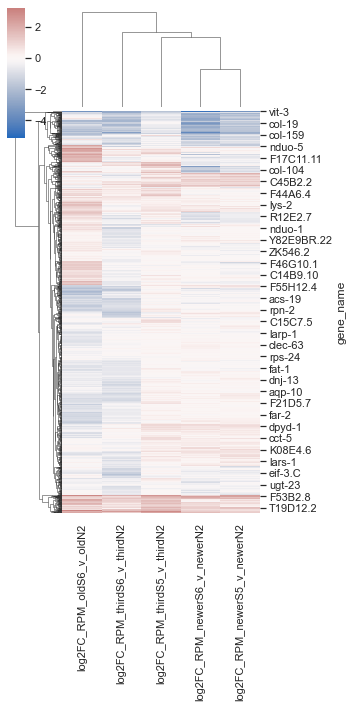

In [139]:
sig_cutoff_num = 0
filtered_plot_df = plot_df.query(f"num_sig_hits >= {sig_cutoff_num}").set_index("gene_name").drop(columns=["num_sig_hits"])
sea.set_theme(style="whitegrid")
sea.clustermap(filtered_plot_df,
               center=0,
               cmap="vlag",
               figsize=(5, 10))
plt.show()

In [132]:
dash_bio.Clustergram(
    data=filtered_plot_df,
    column_labels=list(filtered_plot_df.columns.values),
    row_labels=list(filtered_plot_df.index),
    height=1000,
    width=700,
)

In [99]:
lib_comps_run

[('oldN2', 'oldS6'), ('newerN2', 'newerS6'), ('newerN2', 'newerS5'), ('thirdN2', 'thirdS6'), ('thirdN2', 'thirdS5')]

In [112]:
px.scatter(filtered_plot_df,
           x="log2FC_RPM_newerS6_v_newerN2",
           y="log2FC_RPM_newerS5_v_newerN2",
           )